In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/cancer_classification.csv')

To start getting to know our dataset we can check if there are any null values and some main indicators

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory data analysis

For classification tasks is always a good idea to make a countplot of the label to see the number of instance per label and see if the problem is well balanced or not

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

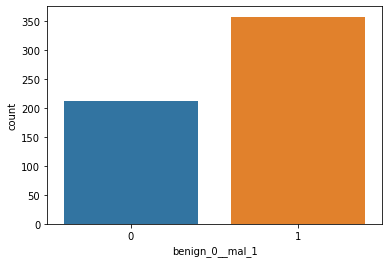

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

The problem looks to be well balanced although we have slightly more malignat tumors. However, the differences are not extreme

What we also can do is check for the correlation between the features themselves and with respect to the label

In [10]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<AxesSubplot:>

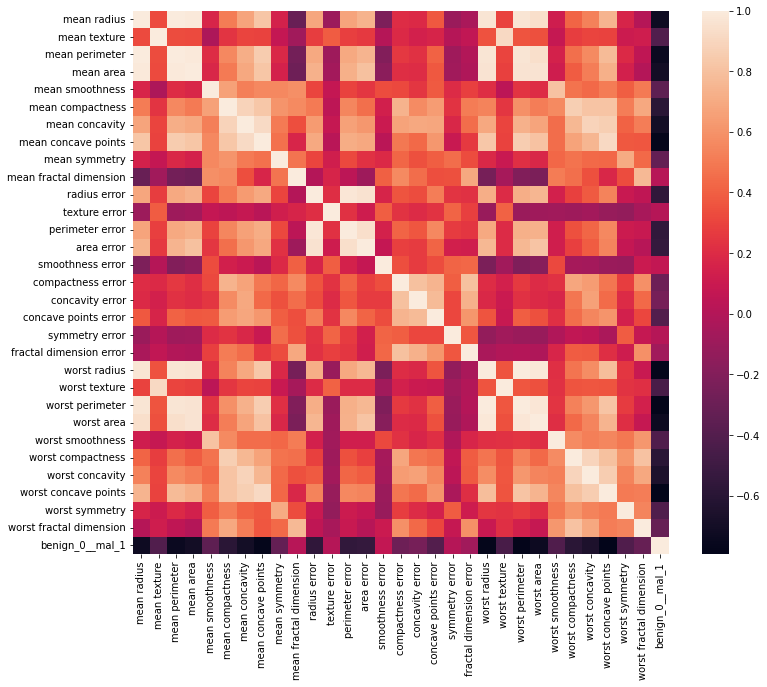

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

<AxesSubplot:>

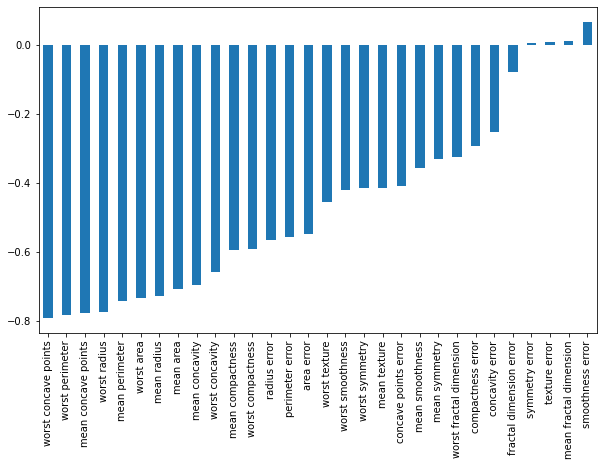

In [15]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

We can see we have highly correlated features to the label sowe should be able to get good predictions out of our model

Since the focus of this project is dealing with overfitting and early stopping we will now stop the EDA part here and move directly into the model creation part

## Model creation

In [19]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense, Dropout

In [32]:
X_test.shape

(143, 30)

In [33]:
y_test.shape

(143,)

In [34]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

We will create a model with a large number of epochs to see how overfitting looks like

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6707 - val_loss: 0.6576
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6285 - val_loss: 0.6154
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5819 - val_loss: 0.5677
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5307 - val_loss: 0.5112
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4751 - val_loss: 0.4514
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4205 - val_loss: 0.3958
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3708 - val_loss: 0.3461
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3289 - val_loss: 0.3054
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2925 - val_loss: 0.2689
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2648 - val_loss: 0.2424
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0503 - val_loss: 0.1215
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0509 - val_loss: 0.1230
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0492 - val_loss: 0.1152
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.1188
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.1283
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0492 - val_loss: 0.1210
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.1178
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.1310
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.1146
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.1318
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.1290
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.1486
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0513 - val_loss: 0.1238
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.1505
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.1295
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.1390
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.1319
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.1291
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.1417
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.1377
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1495
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.1345
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1572
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0302 - val_loss: 0.1442
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.1504
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 0.1427
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1420
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0245 - val_loss: 0.1505
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1502
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.1461
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.1475
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.1601
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1476
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.1498
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.1569
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.1528
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.1513
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.1582
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.1521
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 0.1552
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.1659
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.1668
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.1671
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.1649
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.1718
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0147 - val_loss: 0.1863
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.1711
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1740
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.1663
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.1753
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2307
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.2354
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.2372
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.2364
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.2398
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.2419
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.2494
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.2420
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.2318
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.2454
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.3125
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.3209
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.3187
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.3211
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.3302
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.3236
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.3351
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.3229
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.3292
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.3351
Epoc

<AxesSubplot:>

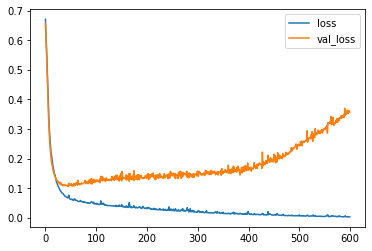

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

This is a perfect example of overfitting. We see here how the losses of both the training and the test dataset are decreasing together until an specific amount of epochs, after that the loss value of the test set beggins to increase and growing away from the loss value of the traing which continues decreasing.

We will now explore how to use Tensorflow-Keras callbacks to introduce what is called early stopping. This means stopping the training based on the validation loss before it gets out of hand.

We recreate the model to re-initialize it

In [37]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

We will create an early stopping callback which monitors the validation loss looking for its minimum. We will also set the patience value to 25. This means even if the minimum is reached we will stop 25 epochs after that to reduce noise.

In [39]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6748 - val_loss: 0.6557
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6421 - val_loss: 0.6271
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6133 - val_loss: 0.5986
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5828 - val_loss: 0.5637
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5454 - val_loss: 0.5229
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5033 - val_loss: 0.4779
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4598 - val_loss: 0.4308
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4149 - val_loss: 0.3844
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3700 - val_loss: 0.3371
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3300 - val_loss: 0.2940
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.0981
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.0980
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.0982
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.1037
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0497 - val_loss: 0.0990
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.1005
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0510 - val_loss: 0.0994
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.1123
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.1003
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0491 - val_loss: 0.1095
Epoch 93/600


The good thing about this is that we don't need to worry anymore about choosing the correct amount of epochs. Instead we will choose a large number and let the callback to stop the traing for us.

Let's now check the model loss

<AxesSubplot:>

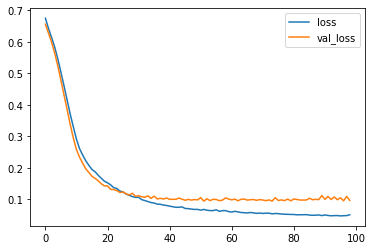

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is the behavior we were looking for: both curves decreasing until they stabilize without increasing.

The next thing we can do to prevent overfitting is adding dropout layers. Dropout layers will automatically turn off a percentage neurons randomly

We need to recreate the model again

In [42]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) #half of the neurons won't be updated and will be turned off

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6868 - val_loss: 0.6733
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6703 - val_loss: 0.6574
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6685 - val_loss: 0.6443
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6586 - val_loss: 0.6273
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6354 - val_loss: 0.6087
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6101 - val_loss: 0.5898
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6028 - val_loss: 0.5620
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5745 - val_loss: 0.5347
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5396 - val_loss: 0.5037
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5221 - val_loss: 0.4738
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1204 - val_loss: 0.1256
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1212 - val_loss: 0.1058
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1322 - val_loss: 0.1035
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1227 - val_loss: 0.1084
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1112 - val_loss: 0.1039
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1205 - val_loss: 0.1100
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1120 - val_loss: 0.1161
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1169 - val_loss: 0.1050
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1105 - val_loss: 0.1017
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1051 - val_loss: 0.1067
Epoch 93/600


<AxesSubplot:>

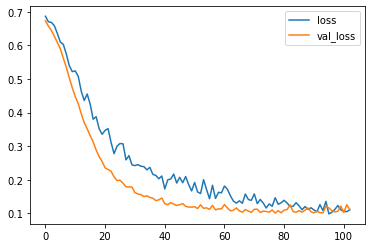

In [44]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

This is a much better result since the loss and validation loss are now more similar to each other than without using dropout

## Model evaluation

In [46]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 [==============================] - 0s 998us/step


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [50]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]


With this metrics we see we have very good values in precission, accuracy and recall. Also from the confusion matrix we see we only missclassified 6 cases 5 of which were actually a real tumor.